# Object-oriented programming

Object-oriented programming is a programming paradigm that will allow you to group together variables and functions linked to a specific purpose.

Objects will help you clean your code, replacing groups of lines by a simple understandable method call. They hide the complexity of your code to make it more accessible, and more flexible.

In this section I will present classes and objects in a general manner, so that we can focus more on the way objects work.

So what is an object ? Steve Jobs himself gave a description in an interview : Objects are like people.


## The basics

Let's see a simple example :

In [2]:
class Animal():
    pass

a = Animal() #instantiate the object a, from the Animal class.

Congratulation, you instantiated your first object !

Here we simply defined an Animal class. This class is then called to instantiate the object a.

We're taking a general approach, unrelated to scientific datas so that you can grasp the general concept of an object (and relax for a while). Let's just imagine we're creating a world with living creatures. The Animal() object will be related to any animal.

For now the Animal() class is empty but we can add intrinsic variables to it, called attributes. We can also implement functions that will act on these attributes, called methods.


In [3]:
class Animal():
    """ A class related to every animal """
    
    age = 1 #age of the animal, in years.
    
    def celebrate_birthday( self ):
        self.age = self.age + 1
        
    def get_age( self ):
        return self.age

my_pet = Animal() #instantiate an animal
print( my_pet.age )

my_pet.celebrate_birthday()
print( my_pet.get_age() )

# How does python handle object's type ? Check for yourself :
print( type(my_pet ) )


1
2
<class '__main__.Animal'>


You can see that adding variables and methods is relatively straightforward.
Variables are usually written first, then functions are defined which take **self** as a first input. This means that the function is associated to the class itself, and you have access to the class methods and properties inside the function by calling it with 'self.' 

Outside of the class definition, self is not defined.
Once an object has been instantiated with the line : *my_pet = Animal()*
Then you can use the variable **my_pet** in the same way that you will use **self** inside the class methods : for example *my_pet.age* will return the age of your object.

This looks pretty similar to the notation we use for np arrays, right ? You could call attributes of an array with A.ndim or A.shape, and methods with A.reshape() , A.min() ...
In fact, lists, np arrays, strings... are all objects in Python. I'm sure you already agree they made your life easier ;)

In general, we don't want the user to directly access the object's attributes, and we will create ***get_*** methods for access, and ***set_*** methods for modifications.


In practice, you will often need to link a few parameter to your object as soon as it is created. For this purpose, objects have a special function **\_\_init\_\_** that is launched once at its creation :

In [4]:
class Animal():
    """ A class related to every animal """
    
    name = ''
    age = 0 #age of the animal, in years.
    
    def __init__(self, name, age=1):
        #setting the object name and age :
         self.name = name 
         self.age = age

    def get_age( self ):
        return self.age

    def get_name( self ):
        return self.name
    
    def describe( self ):
        print( self.name, 'is', self.age , 'years old')
        return


my_pet = Animal( 'Médor', 10) #instantiate a 10 years old animal named Médor
my_pet.age = 11 # We can dynamically change its attribute. Happy birthday Médor !

my_pet.describe() 
print( my_pet )


Médor is 11 years old


Here the **\_init\_** function takes two supplementary mandatory inputs : name and age. They are linked to the class attributes at the creation of the object.
As __init__ will always be called at object creation, the default value **name=' '** and **age=0** set before __init__ will not matter, we can however add default value to the init input parameters so that the user doesn't have to define an age. Here by default the age of an object will be 1.


We have also created a describe() function to better visualize the properties of our object. Printing our object doesnt give us much information, as print returns the memory access of the computer and the Animal class. It would be nice if we could link the describe method to print !

For lists or numpy arrays, print() would print all elements of the object. A similar behaviour can be forced by setting a function __str__ :


In [5]:
class Animal():
    """ A class related to every animal """
    
    name = ''
    age = 0 #age of the animal, in years.
    sex = None # by default.
    sound = ''
    
    def __init__(self, name, age=1):
         self.name = name
         self.age = age
        
    def __str__(self):
         return  self.name + ' is an ' + type(self).__name__ + ' of ' + str(self.age) + ' years'
        
my_pet = Animal( 'Médor', 10) #instantiate a 10 years old animal named Médor
print( my_pet )



Médor is an Animal of 10 years


Now by redefining the __str__ function we modified the output of print() !

There are a lot of built_in object methods and attributes, and most of them will not need to be redefined. But if you want to be able to list your object methods and attributes, you may use dir() :

In [6]:
my_pet = Animal( 'Médor', 10) #instantiate a 10 years old animal named Médor
print( 'All properties :\n' ,dir( my_pet ) ) #list all methods and attributes. You could also replace my_pet with Animal

print('\n')
print('Dict :')
d = my_pet.__dict__
print( d )
print( d['name'] ) #extracting a specific key ('name') from the dictionnary d

All properties :
 ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'age', 'name', 'sex', 'sound']


Dict :
{'name': 'Médor', 'age': 10}
Médor


We can see that a lot of other properties exist, notably attributes are stored in a dictionnary under **\_dict\_**

This is really all there is to know to start object oriented programming. So congratulations ! Most of the time the hardest task it to clearly determine the architecture you need, to make something easy to work with, and flexible.

Usually the object definition is separated in an individual python file, such as Animal_object.py. It is then imported in your main script via the line : import Animal_object, or : from Animal_object import Animal.

Typically for your application, you would teach your object how to load your data, how to smooth it, how to extract value from it... The main parameters such as the file path would be defined in the __init__ function.

## Inheritance

For now this may seem like we could have just used a list, a np.array or a dictionnary (see  https://www.w3schools.com/python/python_dictionaries.asp) to create this kind of data. Though the compactness and clarity it brings is already obvious.

But one powerful aspect of objects is inheritance.
Let's see an example.
First we design the Animal class. We add a method that allows it to speak.

In [7]:
class Animal():
    """ A class related to every animal """
    
    name = ''
    age = 1 #age of the animal, in years.
    sound = ''
    
    def __init__(self, name, age):
         self.name = name
         self.age = age

    def get_age( self ):
        return self.age
    
    def get_name( self ):
        return self.name
    
    def speak( self ):
        print( self.sound )
    
    def describe( self ):
        return self.name + ' is an ' + type(self).__name__ + ' of ' + str(self.age) + ' years'
    
    def __str__(self):
         return  self.describe()


Then we define a Dog class with a little trick : Dog is inherited from Animal.

Try to guess what will be the output of the three last lines ! :

In [8]:
class Dog(Animal):
    """ A dog """
    name = 'Max' #dogs are -by default- named Max
    sex = 'Male' 
    sound = 'Woof Woof'
    
my_pet = Dog( 'Billy', 10 )

print( my_pet )
my_pet.speak()

print( type(my_pet) )

Billy is an Dog of 10 years
Woof Woof
<class '__main__.Dog'>


Magic ! Even though we did not define __init__ or speak() in the Dog class, it knows these methods. It also has an age attribute.

You can notice on the first line that we did not simply design a Dog class, but we linked it to the Animal class.
By doing so, we have created the Dog class by inheriting all methods and attributes of the Animal one. Including __init__ and __str__. This saves us a lot of time, as a dog is inherently an Animal, all of Animal properties do not have to be redefined.

We can now add a few complexity to the Dog class. 


In [9]:
import random # library for random number generation. We will add randomness to dog creation. (you can also use numpy)

class Dog(Animal):
    """ A dog """
    name = 'Max' #dogs are -by default- named Max
    age = 1
    sex = 'Male' 
    sound = 'Woof Woof'
    color = 'brown'
    
    def __init__(self, name='Max', age=1, sex='Male',  color='brown'):
        print('Initializing a Dog object')
        self.name = name
        self.age = age
        self.color = color
        self.sex = sex
            
    def describe( self ):
        return self.name + ' is a ' + self.color +' '+  type(self).__name__ +  ' of ' + str(self.age) + ' years. Sex:' + self.sex
    
    
my_pet = Dog( age=10 )
print( my_pet )
print('\nChecking instance : ')
print( isinstance(my_pet,Dog) )
print( isinstance(my_pet,Animal) )
print( isinstance(my_pet,list) )

Initializing a Dog object
Max is a brown Dog of 10 years. Sex:Male

Checking instance : 
True
True
False


First we redefine the __init__ function to add attributes related to dogs. We also set a default species, in case the user doesn't specify any value.
These modification will override the init method of the Animal() class. 

We modify the describe function to better reflect the nature of a dog (notably its species). You can notice that the __str__ function is inherited from Animal() and does not need to be redefined.  However it calls the describe function from the Dog() class :the Dog class has effectively overwritten the describe method of Animal(), even when called from the parent !

It is a good practice to split your functions into smallest functions as soon as possible, so that if a main function needs to be modified for a particular object, there is only little change to perform.


As an exercice, try to add a **species** attribute to the Dog class, which will be set in the **\_\_init\_\_** function, then add a method to the Dog class that takes as input another Dog object. This method will return a novel dog object, if the two objects are of same species, and different sex.
For checking types, you may use the function **isinstance( object, class )**


Solution here :

In [10]:
import random # library for random number generation. We will add randomness to dog creation. (you can also use numpy)

class Dog(Animal):
    """ A dog """
    name = 'Max' #dogs are -by default- named Max
    age = 1
    sex = 'Male' 
    sound = 'Woof Woof'
    color = 'brown'
    species = ''
    
    def __init__(self, name='Max', age=1, sex='Male', color='brown', species='Yorkshire'):
        print('Initializing a Dog object')
        self.name = name
        self.age = age
        self.species = species
        self.color = color
        self.sex = sex
    
    def conceive( self, dog ):
        """ Allows a dog object to create a new dog object, with the help of another dog of opposite sex. """
        #We check that all conditions are met :
        if isinstance(dog,Dog): #verify the specified object is a Dog.
            if (dog.sex =='Male' and self.sex=='Female') or (dog.sex =='Female' and self.sex=='Male'): #verify compatibility
                if dog.species == self.species: #we'll only allow intra species dog making.
                    #All conditions are met. Proceeding.
                    baby_sex = ['Female','Male'][ random.random()>0.5 ] #random() returns a number between 0-1. if >0.5 => Male, else Female.
                    baby_name = self.name[:int(len(self.name)/2+0.5)] + dog.name[int(len(dog.name)/2-0.5):] #mix of names of father and mother.
                    print('A new dog is born !')
                    return Dog( name=baby_name, age=0, species=self.species, sex = baby_sex)
            
    def describe( self ):
        return self.name + ' is a ' + self.color + ' ' + type(self).__name__ +  ' (' + self.species + ') of ' + str(self.age) + ' years. Sex:' + self.sex
    
    
my_pet = Dog( age=10 )
stray_pet = Dog( 'Falbala', 12 , sex='Female', color='black' )

print( my_pet )
print( stray_pet )
print('\n')

baby_dog = my_pet.conceive( stray_pet )
print( baby_dog )


Initializing a Dog object
Initializing a Dog object
Max is a brown Dog (Yorkshire) of 10 years. Sex:Male
Falbala is a black Dog (Yorkshire) of 12 years. Sex:Female


A new dog is born !
Initializing a Dog object
Mabala is a brown Dog (Yorkshire) of 0 years. Sex:Female


##  Acccessing parent properties with super()

With this, you are now able to create a variety of classes and use inheritance to specify child classes.

However you may have had important initialisation in the Animal() class that has been overwritten by Dog(), you can handle this by calling methods from the parent class directly with two possible syntaxes: super() and parent.method( self, ... )

Let's see an example where instead of setting the name in Dog(), we use the existing implementation in Animal():

In [11]:
class Animal():
    """ A class related to every animal """
    
    name = ''
    sound = ''   
    
    def __init__(self, name):
        self.name = name       
        

class Dog(Animal):
    """ A dog """
    name = 'Max' #dogs are -by default- named Max
    species = ''
    
    def __init__(self, name='Max', species='Yorkshire'):
        print('Initializing a Dog object')
        super().__init__( name=name ) #one flexible way of calling a parent method with super()
        self.species = species
        
class Dog2(Animal):
    """ A dog """
    name = 'Max' #dogs are -by default- named Max
    species = ''
    
    def __init__(self, name='Max', species='Yorkshire'):
        print('Initializing a Dog object')
        Animal.__init__( self, name=name ) #another more explicit way of calling a parent method with class._
        self.species = species
        
        
Bolt = Dog( name='Bolt', species='Golden Retriever' )
print( Bolt.name , 'is a', Bolt.species )

Beethoven = Dog2( name='Beethoven', species='Saint Bernard' )
print( Beethoven.name , 'is a', Beethoven.species )


Initializing a Dog object
Bolt is a Golden Retriever
Initializing a Dog object
Beethoven is a Saint Bernard


The **super()** function goes one step up the inheritance line, to the object's parent. In this case, super() is equivalent to a temporary Animal() object. 

As an exercice, try to include a novel intermediary class Mammal, that inherits from Animal() and for which Dog() inherits from.
The Mammal class will contain an attribute milk_quantity initially set to 10, and a method give_milk() that decrease milk quantity each time it is called. Try to use the super() function to iteratively call the init method of each subsequent parent class. Remember that super() only goes one way up !

In [12]:
class Animal():
    """ A class related to every animal """
    name = ''    
    def __init__(self, name):
        print('Initializing an Animal object')
        self.name = name      
        print('Initializing an Animal object : Finished')

        
class Mammal(Animal):
    """ A class related to every mammal """
    name = ''
    milk_quantity = 0 #here this value should not matter as it will be modified in init.
    def __init__(self, name, milk_quantity=10 ):
        print('Initializing a Mammal object')
        super().__init__( name=name )
        self.milk_quantity = milk_quantity
        print('Initializing a Mammal object : Finished')

        
    def give_milk(self):
        if self.milk_quantity>0:
            self.milk_quantity = self.milk_quantity - 1
            print('Milk has been given, remains :', self.milk_quantity)
        else:
            print('Not enough milk left ! None given.')
            
                  
class Dog(Mammal):
    """ A dog """
    name = 'Max' #dogs are -by default- named Max
    species = ''
    def __init__(self, name='Max', milk_quantity=10, species='Yorkshire'):
        print('Initializing a Dog object')
        super().__init__( name=name, milk_quantity=milk_quantity )
        self.species = species
        print('Initializing a Dog object : Finished')
        

Bolt = Dog( name='Bolt', species='Golden Retriever' )
print('\n')
print( Bolt.name , 'is a', Bolt.species )
Bolt.give_milk()


Initializing a Dog object
Initializing a Mammal object
Initializing an Animal object
Initializing an Animal object : Finished
Initializing a Mammal object : Finished
Initializing a Dog object : Finished


Bolt is a Golden Retriever
Milk has been given, remains : 9


This is not as easy at it may seem, because arguments from each super function has to be kept to be iteratively sent to the next parent.
The Dog class calls the init method of the Mammal class with the name and milk_quantity arguments, then the Mammal class calls the Animal init method with the name argument, once this parent initialisation is over the program goes back to resolving the init method of the Mammal class, then the Dog Class.

To simplify this, some programmers use the notation \*\*kwargs, where the use of \*\* groups arguments to be sent together.
You can return and remove an element of kwargs with the method .pop() :

In [13]:
class Animal():
    """ A class related to every animal """
    name = '' 
    sex = None
    def __init__(self, **kwargs):
        self.name = kwargs.pop('name') #returns and removes 'name' from kwargs
        self.sex = kwargs.pop('sex')
        super().__init__( **kwargs ) #will not do anything (no parent left)
        
class Mammal(Animal):
    """ A class related to every mammal """
    name = ''
    milk_quantity = 0 #here this value should not matter as it will be modified in init.
    
    def __init__(self, **kwargs):
        self.milk_quantity = kwargs.pop('milk_quantity')
        super().__init__( **kwargs )

class Dog(Mammal):
    """ A dog """
    name = 'Max' #dogs are -by default- named Max
    species = ''
    
    def __init__(self, species='Yorkshire',  **kwargs):
        super().__init__(  **kwargs )
        self.species = species
        
Bolt = Dog( species='Golden Retriever', name='Bolt', sex='Male', milk_quantity=10 )
print( Bolt.name , 'is a', Bolt.species  )


Bolt is a Golden Retriever


Using **\*\*kwargs** work in practice but it has two obvious flaws: it makes the code less explicit as variable names disappear, and it doesn't allow a straightforward implementation of default values.
However when an inheritance tree can get big, it is useful to use the kwarg syntax as is it relatively automatic and will adapt itself to your inheritance. I do not recommand using it if your code only has a low number of objects, as explicit calls to variables and classes should be favored.


## Mutiple inheritance

We have seen the case of inheritance from one parent class to a child class. In this case, it is relatively simple to follow the origins of each methods and arguments of our child object.

However, object oriented programming allows you to do more flexible relations between objects. And notably have more than one parent ! You can then inherit from multiple class at the same time.

We will first redefine the Dog and Animal classes without kwargs arguments.
Then, we will define a new kind of class, that can have overlap with objects of Dog type : A Painter.
We will also define a class to generate random images, that will then be used by the Painter class. You do not need to read every lines of this class, but if you have followed the numpy course you should be able to understand them ;)

In [14]:
# First we redefine the Animal and Dog class:
class Animal():
    """ A class related to every animal """
    name = ''    
    def __init__(self, name):
        print('Initializing an Animal object')
        self.name = name              
        
class Dog(Animal):
    """ A dog """
    name = 'Max' #dogs are -by default- named Max
    age = 1
    sex = 'Male' 
    sound = 'Woof Woof'
    color = 'brown'
    species = ''
    
    def __init__(self, name='Max', age=1, sex='Male', color='brown', species='Yorkshire'):
        print('Initializing a Dog object')
        super().__init__( name = name )
        self.age = age
        self.species = species
        self.color = color
        self.sex = sex
    
    def describe( self ):
        return self.name + ' is a ' + self.color + ' ' + type(self).__name__ +  ' (' + self.species + ') of ' + str(self.age) + ' years. Sex:' + self.sex
    

Initializing a Painter object
Starting the painting of an image of size (180, 290)


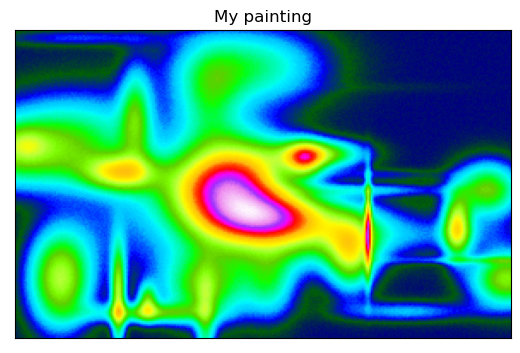

In [15]:
import numpy as np
import matplotlib.pyplot as plt

#We define an image generator
class Image_generator():
    """ A class that generates random sum of 2D gaussians """
    picture_size = (0,0)
    
    def __init__( self , picture_size = (0,0) ):
        self.picture_size = picture_size
        
    def get_image( self, n_gauss=38, amp=100 ):
        """ Returns a random image """
        img = np.random.rand( self.picture_size[0], self.picture_size[1] ) #random image on [0,1]
        img = img + self.add_random_gaussians ( img , n_gauss = n_gauss, amp=amp)
        return img
        
    def gaussian_2D( self, img_size, p ):
        """ returns a 2D gaussian, p is x0,y0 (centers of gaussian) ,sx,sy (deviations of gaussian) """
        x = np.arange( 0, img_size[1], 1) - p[0]
        y = np.arange( 0, img_size[0], 1) - p[1]
        return 1 * np.exp( -0.5*x**2/p[2]**2 )[None,:] * np.exp( -0.5*y**2/p[3]**2 )[:,None]
    
    def random_gaussian2D( self, img_size, amp=1 ):
        """ return a randomly generated 2D gaussian """
        amp = np.random.uniform( 0.1, amp )
        x0,y0 = np.random.randint(1,img_size[1]-1) ,  np.random.randint(1,img_size[0]-1)
        sx,sy = np.random.uniform(1,img_size[1]/8) ,  np.random.uniform(1,img_size[0]/8)
        return amp * self.gaussian_2D( img_size, [x0,y0,sx,sy])
    
    def add_random_gaussians ( self, img , n_gauss = 10, amp= 5):
        """ add n_gauss random gaussians to an image img. """
        for n in range(0,n_gauss):
            img = img + self.random_gaussian2D( img.shape, amp=amp )
        return img


#We define a Painter class
class Painter():
    """ A class related to entities that can paint.
    it will create a picture, and show it with show_painting(). """
    
    name = '' #will be defined in __init__
    generator = None # Image generator for the painting. We will define it at __init__
    picture_size = (0,0)  #canvas size.
    painting = np.zeros( (0,0) )  #current painting.
    picture = None
    
    def __init__( self , picture_size = (180,290) , name='Picasso'):
        print('Initializing a Painter object')
        self.name = name
        self.picture_size = picture_size
        self.picture = np.zeros( picture_size )
        self.generator = Image_generator( self.picture_size )
    
    def paint( self ):
        """Create a random painting, stored in painting attribute. """
        
        print('Starting the painting of an image of size' , self.picture_size )
        if self.picture_size==(0,0):
            return np.zeros( self.picture_size )
        else:
            img = self.generator.get_image()
            
            #we chose randomly among a list of matplotlib color maps : 
            cm = plt.get_cmap( ['nipy_spectral','terrain','prism','gist_ncar','Set1','gray'] [np.random.randint(0,6)])
            colored_image = cm( (img-np.min(img))/(np.max(img)-np.min(img))) #we convert our grayscale image to RGB via the matplotlib colormap.
            self.painting = colored_image
            return colored_image
        
    def show_painting( self):
        """ Plot the painting stored in painting attribute """
        plt.figure()
        plt.imshow( self.painting ); plt.xticks([]); plt.yticks([])
        plt.title('My painting')
    
    def describe( self ):
        return self.name + ' is an ' + type(self).__name__ + ' of ' + str(self.picture_size) + ' picture size'
    
    def __str__(self):
         return  self.describe()
        
#end of class definitions.


Picasso = Painter( name='Picasso' )
Picasso.paint()
Picasso.show_painting() #show the random painting done.



On the object size, there is nothing quite new happening here, apart from the fact that we used one object inside of another object. You can see how our architecture allow us to be flexible : we could just modify the generator attribute of a Painter() to modify the kind of painting it produces.  
The Painter class also has its own describe function, indicating the size of the canvas.

So here we have a new class able to produce random kind of paintings. But what if we want, for example, to have a dog that can paint ?

In [16]:
class Painter_Dog( Dog, Painter):
    
    pass

Matisse = Painter_Dog()

Initializing a Dog object
Initializing an Animal object


Think a moment about what may be happening. A number of questions should naturally arises.

What would happen to attributes and methods shared by the two functions, such as __init__() , describe() and name ?

Let's find out :

In [17]:
class Dog_Painter( Dog, Painter):
    
    pass

my_super_pet = Dog_Painter()

print( my_super_pet )


Initializing a Dog object
Initializing an Animal object
Max is a brown Dog_Painter (Yorkshire) of 1 years. Sex:Male


Here we see that the Dog class has the priority on the Painter methods and attributes : it has the describe() method of Dog and the default name of Dog too.

In [18]:
class Painter_Dog( Painter, Dog):
    
    pass

my_super_pet = Painter_Dog()

print( my_super_pet )

Initializing a Painter object
Picasso is an Painter_Dog of (180, 290) picture size


The order of the inheritance will be important when you consider inheriting from different classes, the first one mentioned having the priority.

You probably noticed that we may have a problem with calling further method. Because an important function will not have been called, for either the Painter or the Dog class: __init__

In [19]:
class Dog_Painter( Dog, Painter):
            
    pass

my_super_pet = Dog_Painter()

my_super_pet.paint()


Initializing a Dog object
Initializing an Animal object
Starting the painting of an image of size (0, 0)


array([], shape=(0, 0), dtype=float64)

For the Painter() class, we do not define a default generator until __init__ is called, and we do redefine the (0,0) picture_size in __init__ too. So we are plotting an empty image.

We solve this by sequentially calling the __init__ methods of both Dog() and Painter() :

Creating a Dog_Painter object
Initializing a Dog object
Initializing an Animal object
Initializing a Painter object
Starting the painting of an image of size (180, 290)
Picasso is a brown Dog_Painter (Yorkshire) of 1 years. Sex:Male


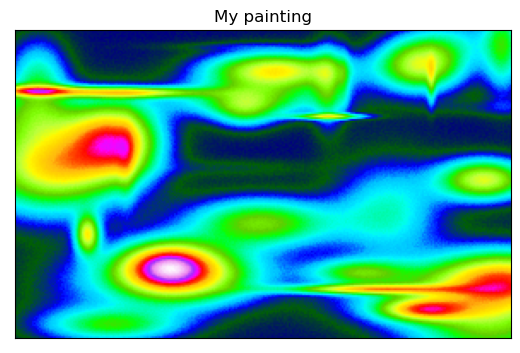

In [26]:
class Dog_Painter( Dog, Painter):
    
    def __init__( self , picture_size = (180,290) , name='Picasso', species='Yorkshire'):
        print('Creating a Dog_Painter object')
        Dog.__init__( self, name=name, species=species )
        Painter.__init__( self, picture_size=picture_size )

    pass
 
my_super_pet = Dog_Painter()
my_super_pet.paint()
my_super_pet.show_painting()

print( my_super_pet  )

And now we have a Dog that can also be a Painter, and shares all methods and attributes of the two classes !

# Conclusion


Now you know the most important things about objects ! At a first glance they look like a compact way of writing a specific script, however the ability to perform inheritance and to use them on a high level makes them a great asset. It will provide flexibility and modularity to your code. Once an object has been set up to handle your data, they make your code much easier to read, but also to maintain.

On the downside, object oriented programming can be tedious to debug as you do not have direct access to the variables inside the methods. To this end, you will often find yourself adding prints and plots inside the object to follow its workflow. It is also a good practice to add a ***logs*** attribute, that will store each method that has been used on your data. The syntax and architecture is also a bit new, so it can take some time to adapt to it. 